## 차원 축소
### PCA (Principa Component Analysis / 주성분분석)

- 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주하여 데이터 변동성이 가장 큰 방향으로 축을 생성하고 새롭게 생성된 축으로 데이터를 투영하는 방식
- 여러 변수들의 변량을 주성분이라는 서로 상관관계가 높은 변수들의 선형결합으로 만들어 변수를 요약 및 축소하는 기법
- 다중공선성이 존재하는 경우, 상관성이 적은 주성분으로 변수들을 축소
- 주성분 분석을 통해 군집분석을 수행하면 군집화 결과와 연산속도 개선가능

주성분은 원 변수들 집합에서 k개의 관찰변수 가중치의 결합이다. 이중, 주성분1은 가장 많은 분산을 설명하는 k개의 가중치 결합이다.

In [14]:
import pandas as pd
data = pd.read_csv('./data/mtcars.csv')
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(data.iloc[:, 1:])

pca = PCA(n_components=4)
pca.fit(scaled_df)

comp = pca.transform(scaled_df)
pca_df = pd.DataFrame(comp, columns=['주성분1', '주성분2', '주성분3', '주성분4'], index=data.iloc[:, 0])
pca_df.head()

,주성분1,주성분2,주성분3,주성분4
Unnamed: 0,,,,
Mazda RX4,0.657213,1.735446,-0.601199,0.115522
Mazda RX4 Wag,0.629396,1.550033,-0.382322,0.202307
Datsun 710,2.779397,-0.146457,-0.241238,-0.249139
Hornet 4 Drive,0.311771,-2.363019,-0.135759,-0.511862
Hornet Sportabout,-1.974489,-0.754402,-1.134402,0.075653


In [16]:
loadings = pd.DataFrame(pca.components_.T, columns=['주성분1', '주성분2', '주성분3', '주성분4'], index=data.columns[1:])
loadings

,주성분1,주성분2,주성분3,주성분4
mpg,0.362531,0.016124,-0.225744,-0.022540
cyl,-0.373916,0.043744,-0.175311,-0.002592
disp,-0.368185,-0.049324,-0.061484,0.256608
hp,-0.330057,0.248784,0.140015,-0.067676
drat,0.294151,0.274694,0.161189,0.854829
wt,-0.346103,-0.143038,0.341819,0.245899
qsec,0.200456,-0.463375,0.403169,0.068077
vs,0.306511,-0.231647,0.428815,-0.214849
am,0.234943,0.429418,-0.205767,-0.030463
gear,0.206916,0.462349,0.289780,-0.264691


In [17]:
ax = pd.DataFrame(pca_df.std()).T
pca_summary = pd.concat([ax, pd.DataFrame(pca.explained_variance_ratio_).set_index(ax.columns).T])
pca_summary

,주성분1,주성분2,주성분3,주성분4
0,2.611814,1.654076,0.804630,0.527536
0,0.600764,0.240952,0.057018,0.024509


In [18]:
import numpy as np

proportion = pca.explained_variance_ratio_
s=0
result = []
for i in range(len(proportion)):
    s = s + proportion[i]
    result.append(np.round(s,4))
    
pca_summary.loc[1] = result

In [19]:
pca_summary.index = ['표준편차','변동량','누적변동량']
pca_summary

,주성분1,주성분2,주성분3,주성분4
표준편차,2.611814,1.654076,0.804630,0.527536
변동량,0.600764,0.240952,0.057018,0.024509
누적변동량,0.600800,0.841700,0.898700,0.923200


주성분 1,2만으로 전체 변동의 84%를 설명할 수 있다.

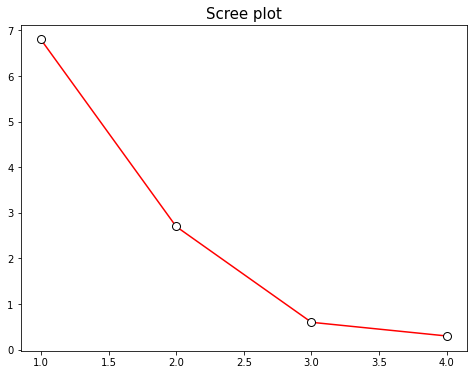

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

per_var = np.round(pca.explained_variance_, decimals=1)
labels = ['주성분' + str(x) for x in range(1, len(per_var) + 1)]

plt.figure(figsize=(8,6))
plt.title('Scree plot', fontsize=15)
plt.plot(range(1,5), per_var, marker='o', markerfacecolor='w', markersize=8, markeredgecolor='k', color='r')
plt.show()

팔꿈치 그림은 주성분이 3개일 때 팔꿈치 모양 존재

In [26]:
def biplot(score, coeff, labels=None, index=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    plt.figure(figsize=(12,9))
    plt.scatter(xs * scalex, ys * scaley, s=5)
    
    for i in range(n):
        plt.arrow(0,0,coeff[i,0], coeff[i,1], color='r', alpha=0.5, head_width=0.01)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1], 'Var'+str(i+1), color='green', ha='center', va='center')
            
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')
            
    for i in range(score.shape[0]):
        if index is None:
            plt.text((xs*scalex)[i], (ys*scaley)[i], str[i])
            
        else:
            plt.text((xs*scalex)[i], (ys*scaley)[i], index[i])
            
    plt.title('PCA - Biplot', fontsize=15)
    plt.xlabel('Comp. {}'.format(1))
    plt.ylabel('Comp. {}'.format(2))
    plt.grid()

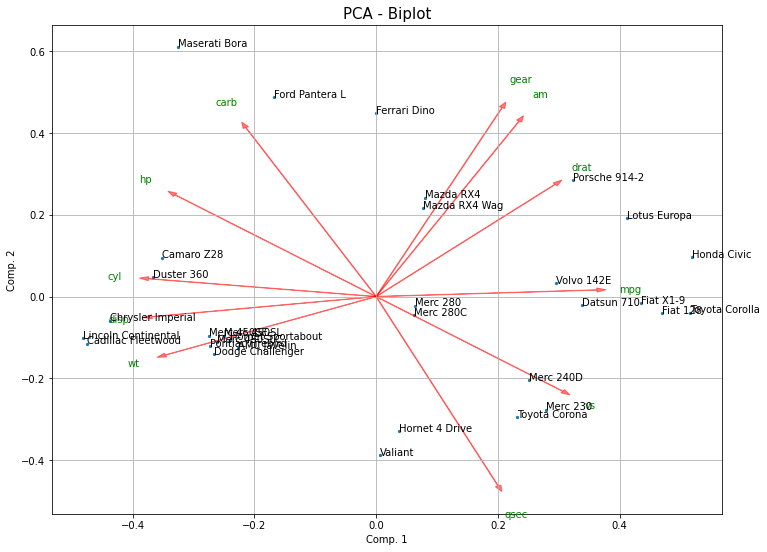

In [27]:
biplot(comp, np.transpose(pca.components_), labels=data.columns[1:], index=data.iloc[:,0])

화살표의 길이가 길수록 원변수의 분산을 잘 설명하는 변수라고 할 수 있다.

화살표는 원변수와 PC의 상관계수를 뜻하며 PC와 평행할수록 해당 PC에 큰 영향

## LDA(Linear Discriminant Analysis / 선형 판별 분석)
- 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소함
- 입력 데이터의 결정값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.
- 클래스간 분산과 클래스 내부 분산의 비율을 최대화 하는 방식으로 차원을 축소한다.
- 즉, 클래스간 분산은 크게 클래스 내부 분산은 최대한 작게 가져간다.

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

data = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
data['target'] = load_iris().target

In [29]:
scaled_df = scaler.fit_transform(data.iloc[:,:-1])

In [30]:
lda = LinearDiscriminantAnalysis(n_components=2)

lda_iris = lda.fit_transform(scaled_df, data.target)

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [32]:
gb = GradientBoostingClassifier(random_state=42)

score = cross_val_score(gb, data.iloc[:,:-1], data.target, scoring='accuracy', cv=5)
score.mean()

0.9600000000000002

In [34]:
score = cross_val_score(gb, lda_iris, data.target, scoring='accuracy', cv=5)
score.mean()

0.96

Lda로 차원을 2차원으로 축소한 후 train/validation을 진행했는데 성능상 별차이가 없는 것을 확인했다.

항상 이렇지는 않음